In [1]:
# Configuración del entorno y librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import sys

# Importar módulos del proyecto
from acciones_data import descargar_datos
from acciones_data import transformar_datos
from acciones_data import entrenar_autots
from acciones_data import predecir_forecast

# Configuración de estilo de gráficos
sns.set_theme(style="darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 12

## 1. Ingesta de Datos (Descarga)

Descargamos los precios de cierre de las últimas 5 años para las acciones tecnológicas seleccionadas: **TSLA, MSFT, GOOGL, AMZN, NVDA**.

⬇️ Descargando datos...
Proyecto raíz: /workspaces/ml-pipeline-e2e-practica
Directorio de destino: /workspaces/ml-pipeline-e2e-practica/.cache/cargados/acciones

Descargando precios de cierre de acciones de tecnología...
Tickers: ['TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']
Destino: /workspaces/ml-pipeline-e2e-practica/.cache/cargados/acciones


/workspaces/ml-pipeline-e2e-practica/acciones-data/src/acciones_data/descargar_datos.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  posible_df = yf.download(tickers_productos, period="5y")
[*********************100%***********************]  5 of 5 completed


✓ Descarga completada exitosamente
  Archivo guardado: /workspaces/ml-pipeline-e2e-practica/.cache/cargados/acciones/precios_cierre_acciones.csv
  Dimensiones: 1255 filas, 5 columnas
Período: últimos 5 años
  Datos desde: 2020-11-20 00:00:00 hasta: 2025-11-19 00:00:00

📊 Muestra de datos crudos ((1255, 5)):


,AMZN,GOOGL,MSFT,NVDA,TSLA
Date,,,,,
2025-11-13,237.580002,278.570007,503.290009,186.860001,401.989990
2025-11-14,234.690002,276.410004,510.179993,190.169998,404.350006
2025-11-17,232.869995,285.019989,507.489990,186.600006,408.920013
2025-11-18,222.550003,284.279999,493.790009,181.360001,401.250000
2025-11-19,222.690002,292.809998,487.119995,186.520004,403.989990


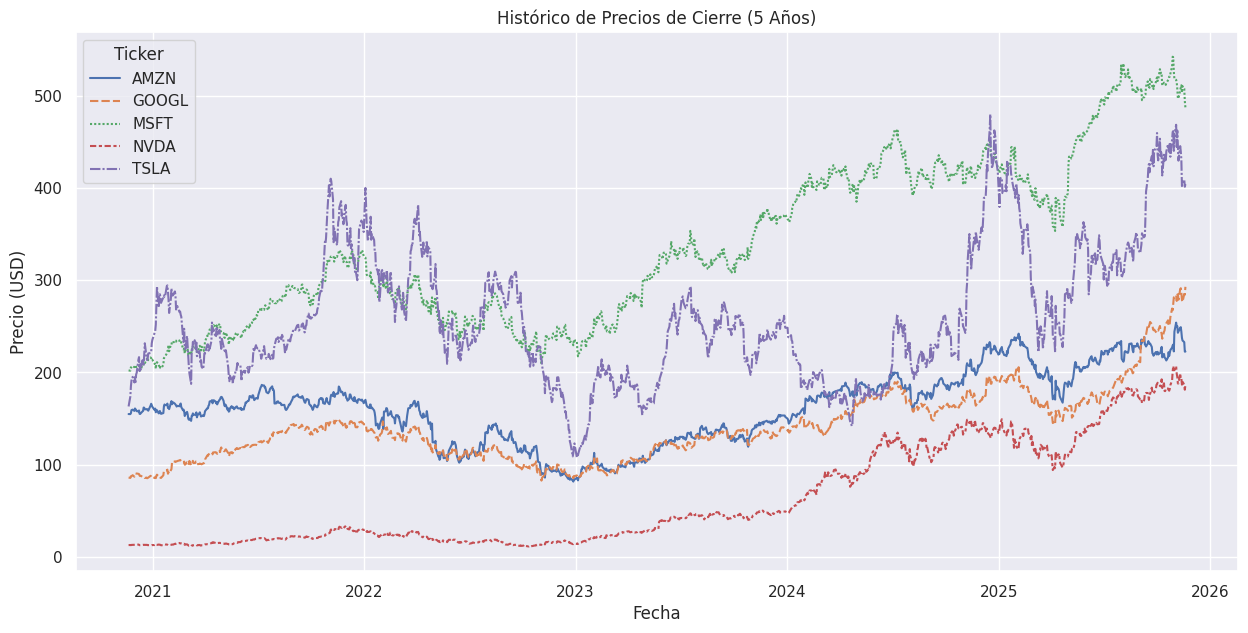

In [2]:
# Ejecutar módulo de descarga
print("⬇️ Descargando datos...")
descargar_datos.main()

# Visualizar los datos crudos descargados
ruta_raw = Path("./.cache/cargados/acciones/precios_cierre_acciones.csv")
df_raw = pd.read_csv(ruta_raw, index_col=0, parse_dates=True)

print(f"\n📊 Muestra de datos crudos ({df_raw.shape}):")
display(df_raw.tail())

# Graficar historia completa
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_raw)
plt.title("Histórico de Precios de Cierre (5 Años)")
plt.ylabel("Precio (USD)")
plt.xlabel("Fecha")
plt.legend(title="Ticker")
plt.show()

## 2. Transformación de Datos

Preparamos los datos para AutoTS. En este caso, aseguramos el formato "Wide" (series temporales en columnas) y validamos la frecuencia.

In [3]:
# Ejecutar transformación
print("🔄 Transformando datos...")
transformar_datos.main()

# Cargar datos transformados
ruta_transformados = Path("./.cache/transformados/acciones/precios_cierre_acciones_transformado.csv")
df_clean = pd.read_csv(ruta_transformados, index_col=0, parse_dates=True)

print(f"\n✅ Datos listos para entrenamiento ({df_clean.shape}):")
display(df_clean.tail())

🔄 Transformando datos...
Proyecto raíz: /workspaces/ml-pipeline-e2e-practica
Archivo fuente: /workspaces/ml-pipeline-e2e-practica/.cache/cargados/acciones/precios_cierre_acciones.csv
Directorio destino: /workspaces/ml-pipeline-e2e-practica/.cache/transformados/acciones

Datos cargados: 1255 filas, 5 columnas
Período: 2020-11-20 00:00:00 a 2025-11-19 00:00:00
Formato validado para AutoTS. Frecuencia inferida: None
Datos transformados guardados en: /workspaces/ml-pipeline-e2e-practica/.cache/transformados/acciones/precios_cierre_acciones_transformado.csv

✓ Transformación completada exitosamente

✅ Datos listos para entrenamiento ((1255, 5)):


,AMZN,GOOGL,MSFT,NVDA,TSLA
Date,,,,,
2025-11-13,237.580002,278.570007,503.290009,186.860001,401.989990
2025-11-14,234.690002,276.410004,510.179993,190.169998,404.350006
2025-11-17,232.869995,285.019989,507.489990,186.600006,408.920013
2025-11-18,222.550003,284.279999,493.790009,181.360001,401.250000
2025-11-19,222.690002,292.809998,487.119995,186.520004,403.989990


## 3. Entrenamiento y Generación de Template

Aquí ocurre la magia de **AutoTS**.
*   Se busca el mejor modelo para cada serie individualmente (**Horizontal Ensemble**).
*   Se exporta la configuración ganadora a `best_model_template.csv`.
*   *Nota: Usamos una configuración rápida para la demo.*

In [5]:
# Ejecutar entrenamiento (puede tardar unos segundos/minutos)
print("🧠 Entrenando modelos (o actualizando template)...")
entrenar_autots.main()

# Inspeccionar el Template generado
ruta_template = Path("./.cache/modelos/acciones/best_model_template.csv")
if ruta_template.exists():
    df_template = pd.read_csv(ruta_template)
    
    print("\n📄 Estructura del Template CSV (Resumen):")
    print(f"Modelos guardados: {len(df_template)}")
    print("Primeras filas del template:")
    display(df_template.head())
else:
    print("⚠️ No se encontró el archivo de template.")

🧠 Entrenando modelos (o actualizando template)...
Proyecto raíz: /workspaces/ml-pipeline-e2e-practica
Archivo de datos transformados: /workspaces/ml-pipeline-e2e-practica/.cache/transformados/acciones/precios_cierre_acciones_transformado.csv
Directorio para guardar modelo: /workspaces/ml-pipeline-e2e-practica/.cache/modelos/acciones

Datos transformados cargados: 1255 filas, 5 columnas
Período: 2020-11-20 00:00:00 a 2025-11-19 00:00:00
Configuración definida:
  Métricas: ['smape', 'mae', 'rmse', 'made']
  Longitud de predicción: 30 días
Modelo AutoTS inicializado con configuración rápida (DevContainer):
  Forecast length: 30
  Ensemble: 'horizontal-max'
  Model list: superfast
  Max generations: 1

Iniciando entrenamiento...
Entrenamiento completado.

RESULTADOS DEL ENTRENAMIENTO
Mejor modelo encontrado: Ensemble
Métrica de validación (Score): 5.7207

Total de modelos evaluados: 151

Top 5 modelos por score (menor es mejor):
  Ensemble - Score: 5.1414 - SMAPE: 4.15943541578949
  Ensemb

,ID,Model,ModelParameters,TransformationParameters,Ensemble
0,11693784ad41974facb5c487fda5843a,Ensemble,"{""model_name"": ""Horizontal"", ""model_count"": 4,...","{""fillna"": ""fake_date"", ""transformations"": {""0...",2
1,2b37b40c74653288d24d2f0bbdab3737,Ensemble,"{""model_name"": ""Horizontal"", ""model_count"": 4,...","{""fillna"": ""fake_date"", ""transformations"": {""0...",2
2,5cc94e0a48559a05333e8304b6e37328,Ensemble,"{""model_name"": ""Horizontal"", ""model_count"": 4,...","{""fillna"": ""fake_date"", ""transformations"": {""0...",2
3,4acdc510739108cc2a603be3ed5e0644,Ensemble,"{""model_name"": ""Horizontal"", ""model_count"": 4,...","{""fillna"": ""fake_date"", ""transformations"": {""0...",2
4,0d380e5d93d56a8ef532fd42450bfc0c,Ensemble,"{""model_name"": ""Horizontal"", ""model_count"": 4,...",{},2


## 4. Inferencia (Pronóstico)

Usamos el template generado para predecir los próximos **30 días**.
*   Esta etapa es muy rápida porque no busca modelos nuevos, solo re-entrena los ganadores.

In [6]:
# Ejecutar predicción
print("🔮 Generando pronóstico...")
predecir_forecast.main()

# Cargar resultados
ruta_forecast = Path("./.cache/predicciones/acciones/pronostico_acciones.csv")
df_forecast = pd.read_csv(ruta_forecast, index_col=0, parse_dates=True)

print("\n📈 Pronóstico generado (Primeros 5 días):")
display(df_forecast.head())

🔮 Generando pronóstico...
Datos transformados cargados: 1255 filas, 5 columnas
Período: 2020-11-20 00:00:00 a 2025-11-19 00:00:00
Configuración definida:
  Métricas: ['smape', 'mae', 'rmse', 'made']
  Longitud de predicción: 30 días

Cargando template desde: /workspaces/ml-pipeline-e2e-practica/.cache/modelos/acciones/best_model_template.csv
Datos históricos disponibles hasta: 2025-11-19 00:00:00
Generando pronóstico para los próximos 30 días...

Pronóstico generado exitosamente.

Primeras 5 filas del pronóstico:
                  AMZN       GOOGL        MSFT        NVDA       TSLA
2025-11-20  222.690002  292.809998  487.119995  186.520004  403.98999
2025-11-21  215.344291  289.621536  486.925762  186.199412  403.98999
2025-11-24  211.671435  290.748259  486.751302  185.717923  403.98999
2025-11-25  207.998579  291.875254  486.596397  185.557292  403.98999
2025-11-26  204.325723  293.002520  486.460803  185.396605  403.98999
Pronóstico guardado en: /workspaces/ml-pipeline-e2e-practica/

,AMZN,GOOGL,MSFT,NVDA,TSLA
2025-11-20,222.690002,292.809998,487.119995,186.520004,403.98999
2025-11-21,215.344291,289.621536,486.925762,186.199412,403.98999
2025-11-24,211.671435,290.748259,486.751302,185.717923,403.98999
2025-11-25,207.998579,291.875254,486.596397,185.557292,403.98999
2025-11-26,204.325723,293.002520,486.460803,185.396605,403.98999


## 5. Visualización Avanzada: Historia + Pronóstico

Unimos los datos históricos recientes con el pronóstico para visualizar la tendencia proyectada.

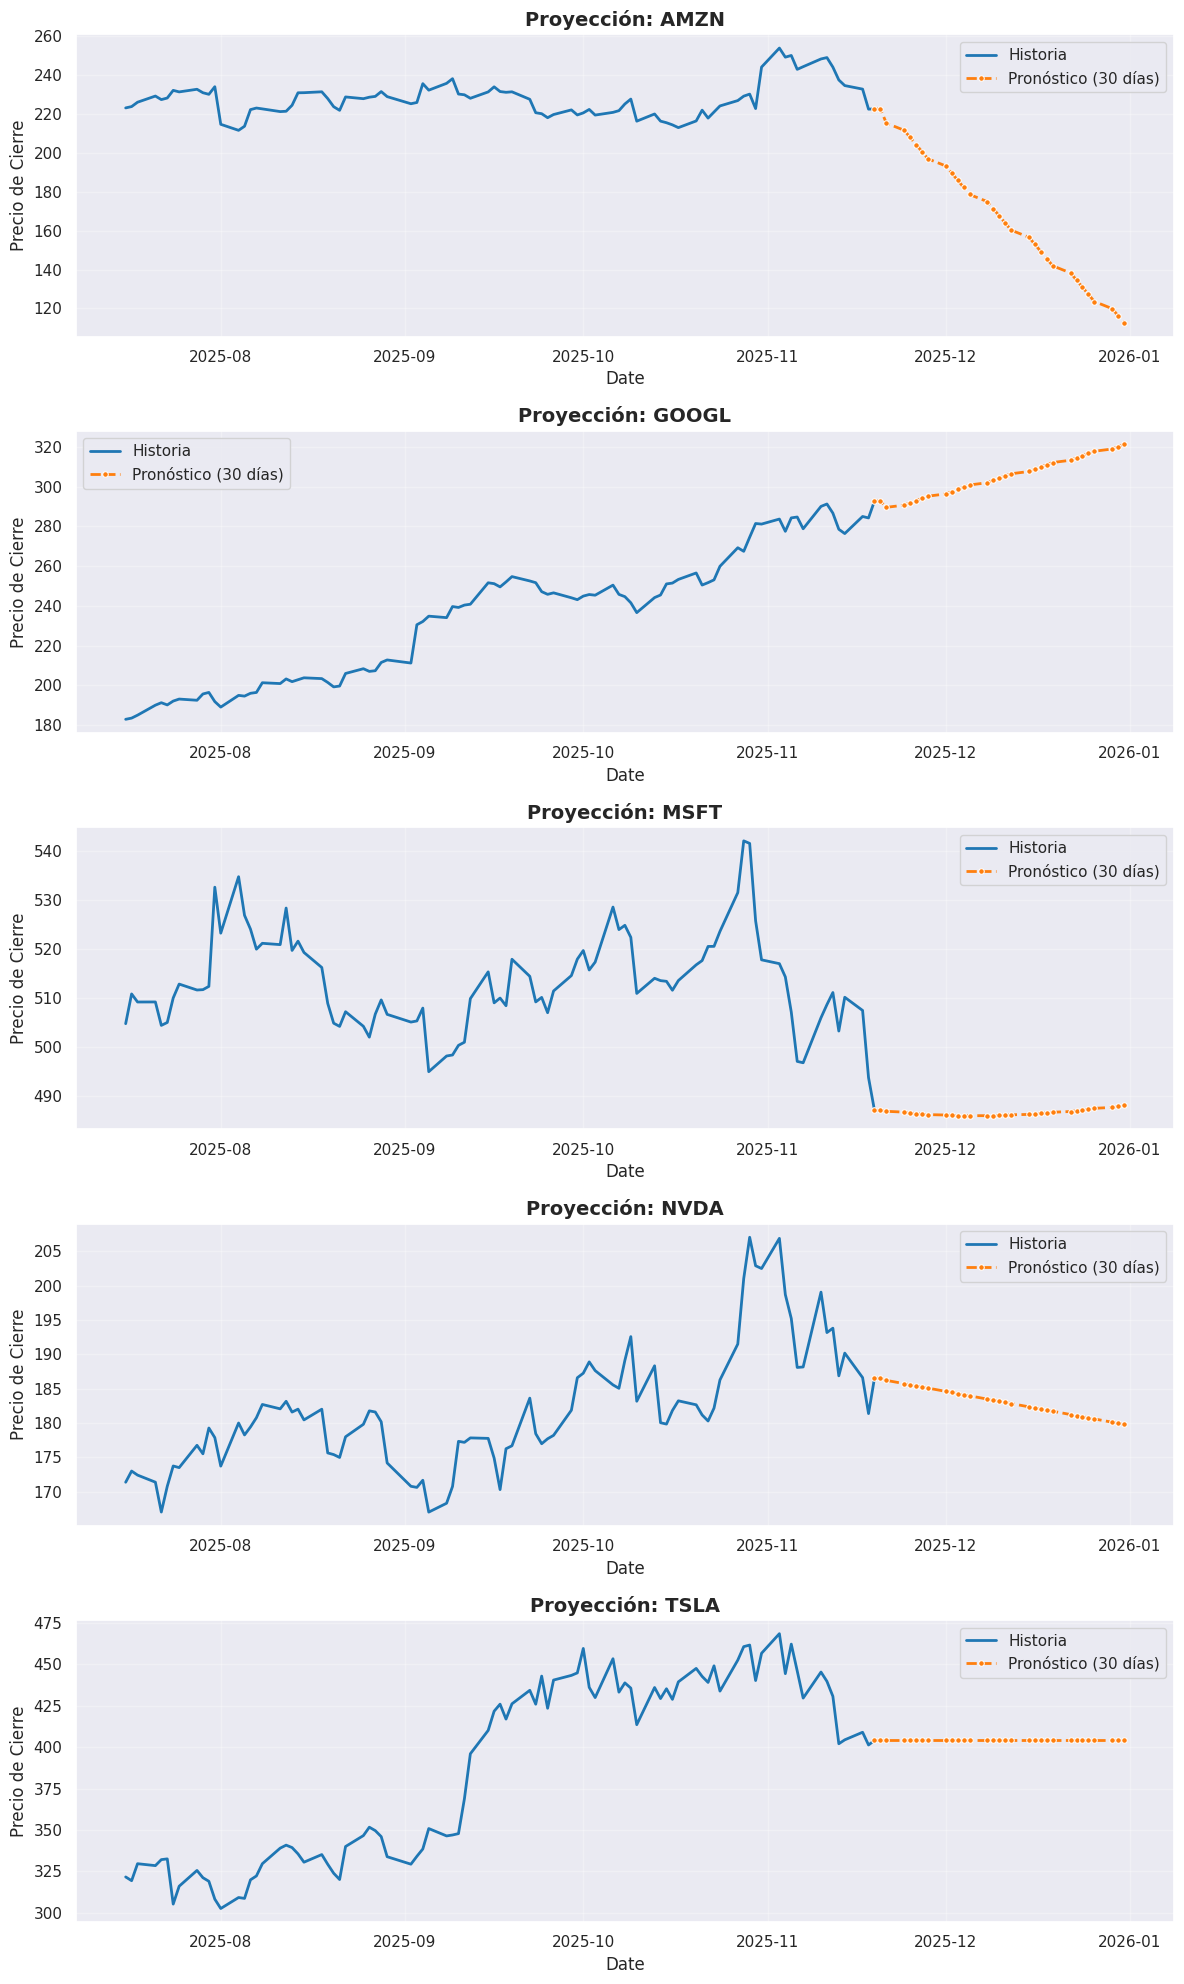

In [7]:
# Configuración de visualización
dias_historia_vis = 90  # Ver últimos 90 días de historia
df_historia_reciente = df_clean.iloc[-dias_historia_vis:]

# Crear subplots para cada acción
acciones = df_forecast.columns
fig, axes = plt.subplots(len(acciones), 1, figsize=(12, 4 * len(acciones)), sharex=False)

if len(acciones) == 1:
    axes = [axes]

for ax, ticker in zip(axes, acciones):
    # Graficar Historia
    sns.lineplot(data=df_historia_reciente[ticker], ax=ax, label='Historia', color='tab:blue', linewidth=2)
    
    # Graficar Pronóstico
    # Conectamos visualmente el último punto de historia con el primero de forecast
    ultimo_historia = df_historia_reciente[ticker].iloc[-1]
    fecha_ultimo_historia = df_historia_reciente.index[-1]
    
    # Crear serie de unión para continuidad visual
    serie_forecast = df_forecast[ticker]
    serie_union = pd.concat([
        pd.Series([ultimo_historia], index=[fecha_ultimo_historia]),
        serie_forecast
    ])
    
    sns.lineplot(data=serie_union, ax=ax, label='Pronóstico (30 días)', color='tab:orange', linestyle='--', linewidth=2, marker='o', markersize=4)
    
    ax.set_title(f"Proyección: {ticker}", fontsize=14, fontweight='bold')
    ax.set_ylabel("Precio de Cierre")
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()